In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Desktop/Pymaceuticals_py/csv_data/Mouse_metadata.csv"
study_results_path = "Desktop/Pymaceuticals_py/csv_data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

full_dataset = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')


# Display the data table for preview
full_dataset.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice = len(full_dataset["Mouse ID"].value_counts())
total_mice = pd.DataFrame({"Total Mice":[mice]})
total_mice.head()

,Total Mice
0,249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups_mice = full_dataset[full_dataset.duplicated(['Mouse ID', 'Timepoint'])]
round(dups_mice,2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.00,0
911,g989,Propriva,Female,21,26,5,47.57,0
913,g989,Propriva,Female,21,26,10,49.88,0
915,g989,Propriva,Female,21,26,15,53.44,0
917,g989,Propriva,Female,21,26,20,54.66,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

full_dataset.drop( full_dataset[full_dataset['Mouse ID']== 'g989'].index, inplace=True)
round(full_dataset,2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.00,0
1,k403,Ramicane,Male,21,16,5,38.83,0
2,k403,Ramicane,Male,21,16,10,35.01,1
3,k403,Ramicane,Male,21,16,15,34.22,1
4,k403,Ramicane,Male,21,16,20,33.00,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.15,2
1889,z969,Naftisol,Male,9,30,30,65.84,3
1890,z969,Naftisol,Male,9,30,35,69.18,4
1891,z969,Naftisol,Male,9,30,40,70.31,4


In [5]:
# Checking the number of mice in the clean DataFrame.
mice2 = len(full_dataset["Mouse ID"].value_counts())
clean_mice = pd.DataFrame({"No Duplicates Mice":[mice2]})
clean_mice.head()

,No Duplicates Mice
0,248


In [6]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

tumorv_mean = full_dataset.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumorv_median = full_dataset.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumorv_var = full_dataset.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumorv_std = full_dataset.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumorv_sem = full_dataset.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
                                                              
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_df = round(pd.DataFrame({"Tumor Volume Mean": tumorv_mean, "Tumor Volume Median": tumorv_median,
                                   "Tumor Volume Standard Deviation": tumorv_std, "Tumor Volume SEM": tumorv_sem}),2)

# Assemble the resulting series into a single summary dataframe.
summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,
Capomulin,40.68,41.56,4.99,0.33
Ceftamin,52.59,51.78,6.27,0.47
Infubinol,52.88,51.82,6.57,0.49
Ketapril,55.24,53.70,8.28,0.60
Naftisol,54.33,52.51,8.13,0.60
Placebo,54.03,52.29,7.82,0.58
Propriva,52.32,50.45,6.62,0.54
Ramicane,40.22,40.67,4.85,0.32
Stelasyn,54.23,52.43,7.71,0.57


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

summary_line = round(full_dataset.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(["mean", "median", "var", "std", "sem"],axis="columns"),2)
summary_line 

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


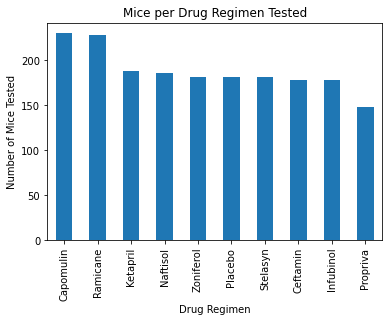

In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints = full_dataset.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending=False)
pd_barplot= timepoints.plot.bar(title="Mice per Drug Regimen Tested")
pd_barplot.set_xlabel("Drug Regimen")
pd_barplot.set_ylabel("Number of Mice Tested")
plt.show()


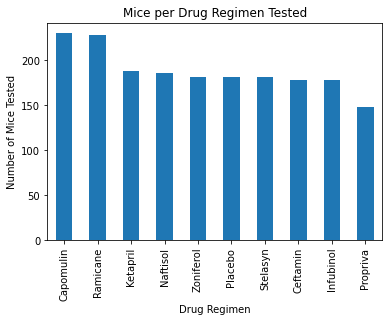

In [9]:
 # Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoints2 = full_dataset.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending=False)
pyplot_bar = pd.DataFrame(timepoints2)
pyplot_bar.plot.bar(legend=False)
plt.title("Mice per Drug Regimen Tested")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

<AxesSubplot:title={'center':'Distribution of Female vs Male Mice'}, ylabel='Mouse ID'>

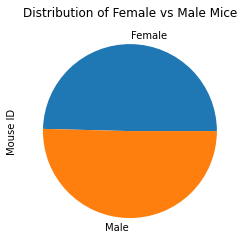

In [10]:
,# Generate a pie plot showing the distribution of female versus male mice using Pandas
pd_pie = full_dataset.groupby("Sex").nunique()["Mouse ID"]
pd_pie.plot.pie(title="Distribution of Female vs Male Mice")

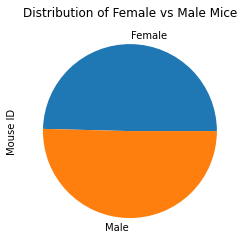

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pyplot_pie = full_dataset.groupby("Sex").nunique()["Mouse ID"]
pyplot_piedf = pd.DataFrame(pyplot_pie)
plt.pie(pyplot_pie, labels=pyplot_pie.index)
plt.ylabel("Mouse ID")
plt.title("Distribution of Female vs Male Mice")
plt.show()

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = full_dataset.groupby("Mouse ID").max()["Timepoint"]
last_timepointdf = pd.DataFrame(last_timepoint)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepointdf,full_dataset, on=("Mouse ID","Timepoint"))
round(merged_data,2)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.97,2
1,a251,45,Infubinol,Female,21,25,65.53,1
2,a262,45,Placebo,Female,17,29,70.72,4
3,a275,45,Ceftamin,Female,20,28,63.00,3
4,a366,30,Stelasyn,Female,16,29,63.44,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.71,0
244,z578,45,Ramicane,Male,11,16,30.64,0
245,z581,45,Infubinol,Female,24,25,62.75,3
246,z795,45,Naftisol,Female,13,29,65.74,3


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

vol_cap = []
vol_ram = []
vol_inf = []
vol_ceft = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.   
# Locate the rows which contain mice on each drug and get the tumor volumes
   
for index, row in merged_data.iterrows():
    if row["Drug Regimen"] == "Capomulin":
        vol_cap.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == drugs[1]:
        vol_ram.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == drugs[2]:
        vol_inf.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == drugs[3]:
        vol_ceft.append(row["Tumor Volume (mm3)"])
    
# add subset 
drugsdf = pd.DataFrame({"Capomulin": vol_cap,
                       drugs[1]: vol_ram,
                       drugs[2]: vol_inf,
                       drugs[3]: vol_ceft})   
    
# Determine outliers using upper and lower bounds

drugs_upper= drugsdf.max()
drug_lower = drugsdf.min()

round(drugsdf,3)

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.983,38.408,67.973,62.999
1,38.940,43.048,65.526,45.000
2,30.486,38.810,57.032,56.058
3,37.074,32.979,66.083,55.743
4,40.159,38.342,72.227,48.722
5,47.686,33.398,36.321,47.785
6,37.312,37.311,60.970,61.849
7,38.125,40.659,62.435,68.923
8,38.753,29.128,60.919,67.749
9,41.483,33.562,67.290,57.918


In [14]:
#Calculate the quartiles and IRQ and quantitatively determine if there are any potential outliers across all four treatment regimens.

#Capomulin
quartiles_cap = drugsdf[drugs[0]].quantile([.25, .5, .75])
lowq_cap = quartiles_cap[.25]
medq_cap = quartiles_cap[.5]
upq_cap = quartiles_cap[.75]
IQR_cap = upq_cap-lowq_cap
lowb_cap = lowq_cap - (1.5*IQR_cap)
upb_cap = upq_cap + (1.5*IQR_cap)
max_cap = drugsdf[drugs[0]].max()
min_cap = drugsdf[drugs[0]].min()

#Ramicane
quartiles_ram = drugsdf["Ramicane"].quantile([.25, .5, .75])
lowq_ram = quartiles_ram[.25]
medq_ram = quartiles_ram[.5]
upq_ram = quartiles_ram[.75]
IQR_ram = upq_ram-lowq_ram
lowb_ram = lowq_ram - (1.5*IQR_ram)
upb_ram = upq_ram + (1.5*IQR_ram)
max_ram = drugsdf[drugs[1]].max()
min_ram = drugsdf[drugs[1]].min()

#Infubinol
quartiles_inf = drugsdf[drugs[2]].quantile([.25, .5, .75])
lowq_inf = quartiles_inf[.25]
medq_inf = quartiles_inf[.5]
upq_inf = quartiles_inf[.75]
IQR_inf = upq_inf-lowq_inf
lowb_inf = lowq_inf - (1.5*IQR_inf)
upb_inf = upq_inf + (1.5*IQR_inf)
max_inf = drugsdf[drugs[2]].max()
min_inf = drugsdf[drugs[2]].min()

#Ceftamin
quartiles_ceft = drugsdf[drugs[3]].quantile([.25, .5, .75])
lowq_ceft = quartiles_ceft[.25]
medq_ceft = quartiles_ceft[.5]
upq_ceft = quartiles_ceft[.75]
IQR_ceft = upq_ceft-lowq_ceft
lowb_ceft = lowq_ceft - (1.5*IQR_ceft)
upb_ceft = upq_ceft + (1.5*IQR_ceft)
max_ceft = drugsdf[drugs[3]].max()
min_ceft = drugsdf[drugs[3]].min()

outliers = pd.DataFrame({"Drugs": drugs,
                        "Lower Quartile":[lowq_cap, lowq_ram, lowq_inf, lowq_ceft],
                        "Upper Quartile":[upq_cap, upq_ram, upq_inf, upq_ceft],
                        "IQR":[IQR_cap, IQR_ram, IQR_inf, IQR_ceft],
                        "Median":[medq_cap, medq_ram, medq_inf, medq_ceft],
                        "Upper Bound": [upb_cap, upb_ram, upb_inf, upb_ceft],
                        "Lower Bound": [lowb_cap, lowb_ram, lowb_inf, lowb_ceft],
                        "Max": [max_cap, max_ram, max_inf, max_ceft],
                         "Min" : [min_cap, min_ram, min_inf, min_ceft]})
outliers

,Drugs,Lower Quartile,Upper Quartile,IQR,Median,Upper Bound,Lower Bound,Max,Min
0,Capomulin,32.377357,40.159220,7.781863,38.125164,51.832015,20.704562,47.685963,23.343598
1,Ramicane,31.560470,40.659006,9.098537,36.561652,54.306811,17.912664,45.220869,22.050126
2,Infubinol,54.048608,65.525743,11.477135,60.165180,82.741446,36.832905,72.226731,36.321346
3,Ceftamin,48.722078,64.299830,15.577752,59.851956,87.666458,25.355450,68.923185,45.000000


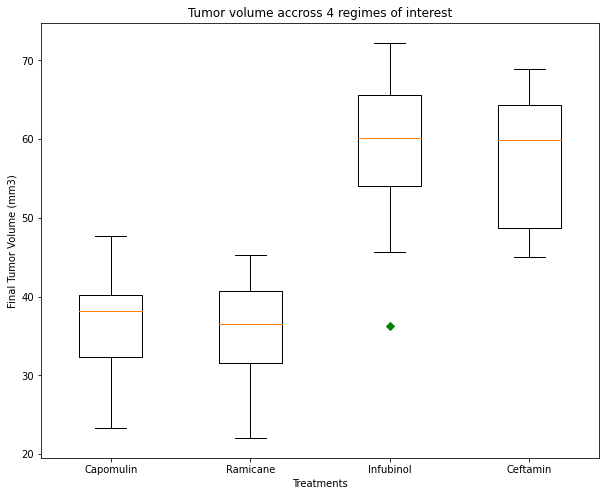

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot_list = [drugsdf[drugs[0]],
                drugsdf[drugs[1]],
                drugsdf[drugs[2]],
                drugsdf[drugs[3]]]

fig1, ax = plt.subplots(figsize=(10,8))
ax.set_title("Tumor volume accross 4 regimes of interest") 
ax.set_xlabel("Treatments") 
ax.set_ylabel("Final Tumor Volume (mm3)") 
ax.boxplot(boxplot_list, 0, "gD")
plt.xticks([1,2,3,4], drugs) 
plt.show()

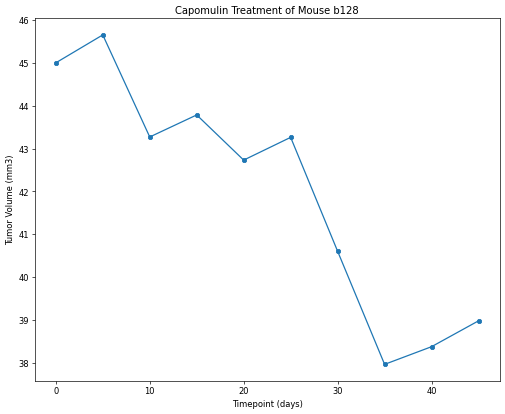

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse = full_dataset.loc[full_dataset["Mouse ID"] == "b128"]

plt.figure(figsize=(10, 8), dpi=60)
plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"], marker = "8")

plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse b128")
plt.show()

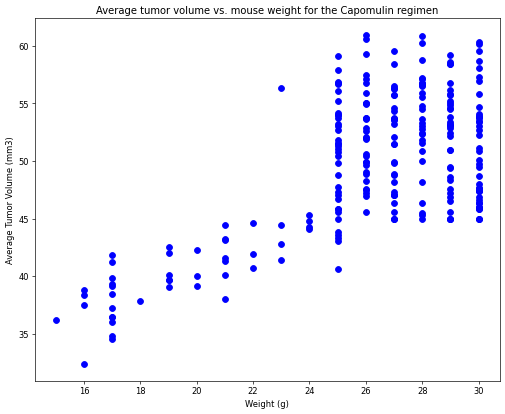

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = full_dataset.loc[full_dataset["Drug Regimen"] == "Capomulin"]

avg_m = full_dataset.groupby(["Mouse ID"]).mean()

plt.figure(figsize=(10, 8), dpi=60)
plt.scatter(avg_m["Weight (g)"],avg_m["Tumor Volume (mm3)"], s=50,c="blue")
plt.title("Average tumor volume vs. mouse weight for the Capomulin regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

The r-squared is: 0.6595577594236613
The equation of the regression line is: y = 1.1x + 21.01


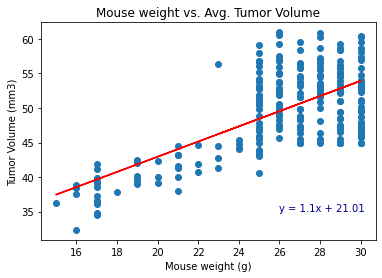

In [18]:
x_value = avg_m["Weight (g)"]
y_value = avg_m["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(26,35),fontsize=10,color="darkblue")
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")

plt.show()
